# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables\
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_response_data

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_response_data

# Compute current value of my crpto
btc_current_value = btc_response_data['data']['1']['quotes']['USD']['price']
eth_current_value = eth_response_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_current_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_current_value:0.2f}")

The current value of your 1.2 BTC is $39437.00
The current value of your 5.3 ETH is $2212.46


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2024-01-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df
                                  
# Reorganize the DataFrame

# Separate ticker data
AGG = df_portfolio [df_portfolio ['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio [df_portfolio ['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                           close   high      low trade_count   open   volume   
timestamp                                                                      
2024-01-19 05:00:00+00:00  98.02  98.02  97.6714       32021  97.89  9126091   

                                        SPY                                \
                               vwap   close    high       low trade_count   
timestamp                                                                   
2024-01-19 05:00:00+00:00  97.90435  482.43  482.72  476.5374      607546   

                                                         
                             open     volume       vwap  
timestamp                                                
2024-01-19 05:00:00+00:00  477.65  110780877  479.96547

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.02
Current SPY closing price: $482.43


/var/folders/s9/3nb3hsgs3xddn3d1jqdzx6fw0000gn/T/ipykernel_64907/4254263255.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(df_portfolio["AGG"]["close"])
/var/folders/s9/3nb3hsgs3xddn3d1jqdzx6fw0000gn/T/ipykernel_64907/4254263255.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(df_portfolio["SPY"]["close"])


In [10]:
# Compute the current value of shares
agg_current_value = my_agg * agg_close_price
spy_current_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_current_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_current_value:0.2f}")

The current value of your 50 SPY shares is $24121.50
The current value of your 200 AGG shares is $19604.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_financial_assets = btc_current_value + eth_current_value
stockbond_financial_assets = agg_current_value + agg_current_value

value_data = {
    'amount': [crypto_financial_assets,stockbond_financial_assets],
    'asset': ["crypto","shares"]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data).set_index('asset')

# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,41649.46
shares,39208.00


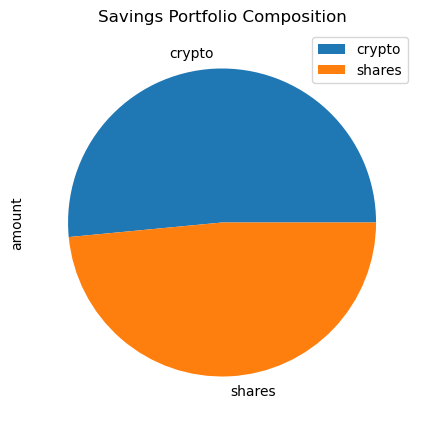

In [12]:
# Plot savings pie chart
pie_chart = df_savings.plot.pie(y = 'amount' , title= "Savings Portfolio Composition", figsize = (5,5))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

#Validate saving health
#If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
if total_savings > emergency_fund:
    print(f"Congrats! You have enough money in the emergency fund.")
    
#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
elif total_savings == emergency_fund:
    print(f"Congrats! You have reached this financial goal.")
          
#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.
else:
    print(f"The ${emergency_fund - total_savings:0.2f} away from achieving the financial goal. Continue saving!")

Congrats! You have enough money in the emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-01-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-01-19', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_five_year = alpaca.get_bars(
    tickers,
    timeframe,
    start= start_date,
    end= end_date,
).df

# Reorganize the DataFrame
df_five_year

# Separate ticker data
AGG = df_five_year[df_five_year["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_five_year[df_five_year["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_five_year = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_five_year

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2019-01-22 05:00:00+00:00  106.44  106.6200  106.4400       16570  106.44   
2019-01-23 05:00:00+00:00  106.55  106.5900  106.3700       11639  106.38   
2019-01-24 05:00:00+00:00  106.73  106.8400  106.6700       14633  106.72   
2019-01-25 05:00:00+00:00  106.68  106.7000  106.5600       15541  106.64   
2019-01-28 05:00:00+00:00  106.62  106.7450  106.5800       17764  106.62   
...                           ...       ...       ...         ...     ...   
2024-01-12 05:00:00+00:00   99.10   99.3600   98.9600       26760   99.14   
2024-01-16 05:00:00+00:00   98.36   98.8500   98.2701       44947   98.72   
2024-01-17 05:00:00+00:00   98.09   98.2099   97.9400       30879   98.16   
2024-01-18 05:00:00+00:00   98.00   98.1950   97.8900       26014   98.16   
2024-01-19 05:00:00+00:00   98.02   98.0200   97.6714       32021   97.89   

                                                    SPY                      \
                             volume        vwap   close      high       low   
timestamp                                                                     
2019-01-22 05:00:00+00:00   7065826  106.528223  262.94  265.0600  261.0600   
2019-01-23 05:00:00+00:00   3473856  106.504969  263.35  264.7900  260.6600   
2019-01-24 05:00:00+00:00   7961374  106.741608  263.60  264.2000  262.0800   
2019-01-25 05:00:00+00:00   3633492  106.640407  265.78  266.7000  263.6595   
2019-01-28 05:00:00+00:00   8294535  106.634323  263.78  263.8300  261.7900   
...                             ...         ...     ...       ...       ...   
2024-01-12 05:00:00+00:00   6359407   99.109776  476.68  478.6000  475.2300   
2024-01-16 05:00:00+00:00  14489797   98.453263  474.93  476.6098  473.0600   
2024-01-17 05:00:00+00:00   8977600   98.087413  472.29  472.7900  469.8700   
2024-01-18 05:00:00+00:00  10575151   98.017836  476.49  477.0600  472.4200   
2024-01-19 05:00:00+00:00   9126091   97.904350  482.43  482.7200  476.5374   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2019-01-22 05:00:00+00:00      522147  264.82  117524932  262.946887  
2019-01-23 05:00:00+00:00      445442  264.01   87913109  262.805970  
2019-01-24 05:00:00+00:00      315574  263.21   61342224  263.264945  
2019-01-25 05:00:00+00:00      409292  265.61   98218282  265.862184  
2019-01-28 05:00:00+00:00      408382  263.39   87421778  263.369609  
...                               ...     ...        ...         ...  
2024-01-12 05:00:00+00:00      470201  477.84   57998192  476.587861  
2024-01-16 05:00:00+00:00      592233  475.26   85015070  474.916972  
2024-01-17 05:00:00+00:00      520417  471.82   68843871  471.773122  
2024-01-18 05:00:00+00:00      558708  474.01   91856348  474.745846  
2024-01-19 05:00:00+00:00      607546  477.65  110780877  479.965470  

[1258 rows x 14 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_five_year,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [17]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2019-01-22 05:00:00+00:00  106.44  106.620  106.44       16570  106.44   
2019-01-23 05:00:00+00:00  106.55  106.590  106.37       11639  106.38   
2019-01-24 05:00:00+00:00  106.73  106.840  106.67       14633  106.72   
2019-01-25 05:00:00+00:00  106.68  106.700  106.56       15541  106.64   
2019-01-28 05:00:00+00:00  106.62  106.745  106.58       17764  106.62   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2019-01-22 05:00:00+00:00  7065826  106.528223          NaN  262.94  265.06   
2019-01-23 05:00:00+00:00  3473856  106.504969     0.001033  263.35  264.79   
2019-01-24 05:00:00+00:00  7961374  106.741608     0.001689  263.60  264.20   
2019-01-25 05:00:00+00:00  3633492  106.640407    -0.000468  265.78  266.70   
2019-01-28 05:00:00+00:00  8294535  106.634323    -0.000562  263.78  263.83   

                                                                    \
                                low trade_count    open     volume   
timestamp                                                            
2019-01-22 05:00:00+00:00  261.0600      522147  264.82  117524932   
2019-01-23 05:00:00+00:00  260.6600      445442  264.01   87913109   
2019-01-24 05:00:00+00:00  262.0800      315574  263.21   61342224   
2019-01-25 05:00:00+00:00  263.6595      409292  265.61   98218282   
2019-01-28 05:00:00+00:00  261.7900      408382  263.39   87421778   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-01-22 05:00:00+00:00  262.946887          NaN  
2019-01-23 05:00:00+00:00  262.805970     0.001559  
2019-01-24 05:00:00+00:00  263.264945     0.000949  
2019-01-25 05:00:00+00:00  265.862184     0.008270  
2019-01-28 05:00:00+00:00  263.369609    -0.007525

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985519,0.998624,1.000290,0.997384,0.994894,1.003485,0.996124,0.995779,1.011217,1.016503,...,0.994772,1.012960,0.993935,0.995385,0.987250,0.988970,1.001118,0.989838,1.004003,1.009795
2,0.980684,1.002336,1.016897,1.008426,0.985055,1.018320,0.993011,1.008580,1.027860,1.021081,...,0.993178,1.001355,0.986611,1.015413,0.986932,0.986930,1.007808,0.995322,1.010381,1.006443
3,0.990850,1.001343,1.022093,1.016793,0.986379,1.016786,0.997299,0.994525,1.025936,1.008218,...,0.993600,0.999695,0.987293,1.026385,0.985986,0.981345,1.000512,0.995412,1.017194,1.010310
4,0.985728,0.997644,1.019234,1.015523,0.981346,1.015689,0.997187,1.005096,1.028884,1.015001,...,1.004782,1.007140,0.976288,1.029381,0.980389,0.975295,1.005810,1.012061,1.003820,1.021303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.720600,26.859445,22.157502,6.331041,2.882234,6.111313,9.488064,1.401373,5.352021,1.816896,...,8.249236,18.078441,9.650670,16.976110,16.070868,6.320770,7.644916,25.860807,4.693521,5.528904
7557,3.679956,26.715860,22.195389,6.297842,2.896046,6.152709,9.507230,1.423064,5.325446,1.795143,...,8.260077,18.348683,9.725841,16.772081,16.106998,6.356067,7.536759,26.192080,4.608995,5.557192
7558,3.663611,26.429389,22.063161,6.314875,2.868262,6.176499,9.506595,1.423275,5.356184,1.792760,...,8.257417,18.229019,9.746825,16.656155,15.929011,6.265674,7.522597,26.642479,4.620374,5.559610
7559,3.660880,26.549061,22.190211,6.192691,2.873165,6.240343,9.543924,1.418225,5.305310,1.803053,...,8.207112,18.213453,9.855424,16.645050,15.757081,6.232330,7.597231,26.445270,4.634630,5.520159


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

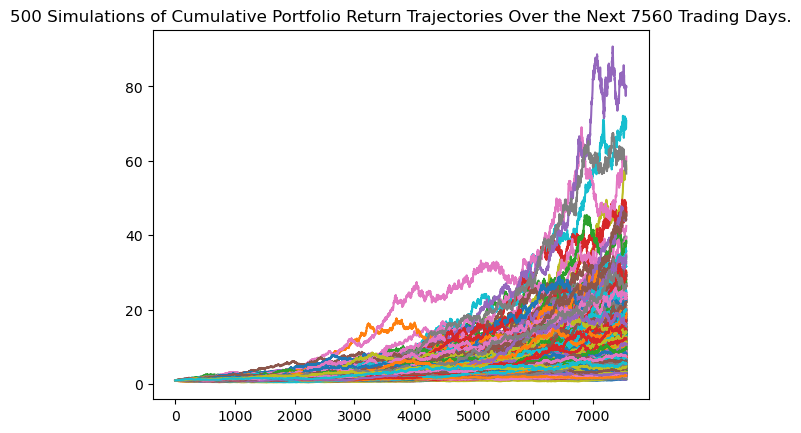

In [19]:
# Plot simulation outcomes
MC_thirty_year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

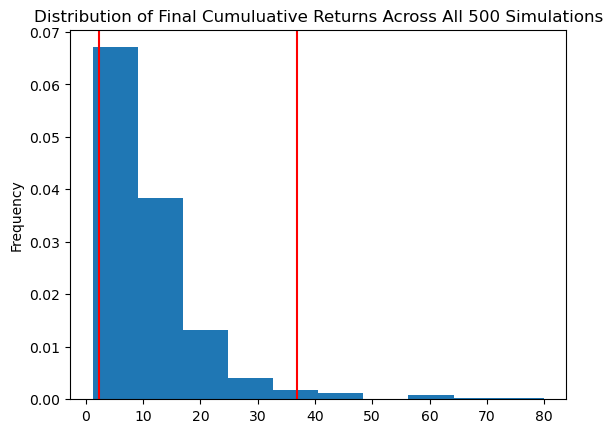

In [20]:
# Plot probability distribution and confidence intervals
MC_thirty_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_table = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_table)

count           500.000000
mean             11.256645
std               9.483890
min               1.209120
25%               5.730786
50%               8.469881
75%              13.612311
max              79.934908
95% CI Lower      2.218047
95% CI Upper     36.859569
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
first_initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
first_ci_lower = round(MC_summary_table[8]*first_initial_investment,2)
first_ci_upper = round(MC_summary_table[9]*first_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${first_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${first_ci_lower} and ${first_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44360.94 and $737191.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
second_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
second_ci_lower = round(MC_summary_table[8]*second_initial_investment,2)
second_ci_upper = round(MC_summary_table[9]*second_initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${second_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${second_ci_lower} and ${second_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $66541.42 and $1105787.08


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'initial_investment' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")